In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [262]:
df = pd.read_csv("PJME_hourly.csv")
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [263]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


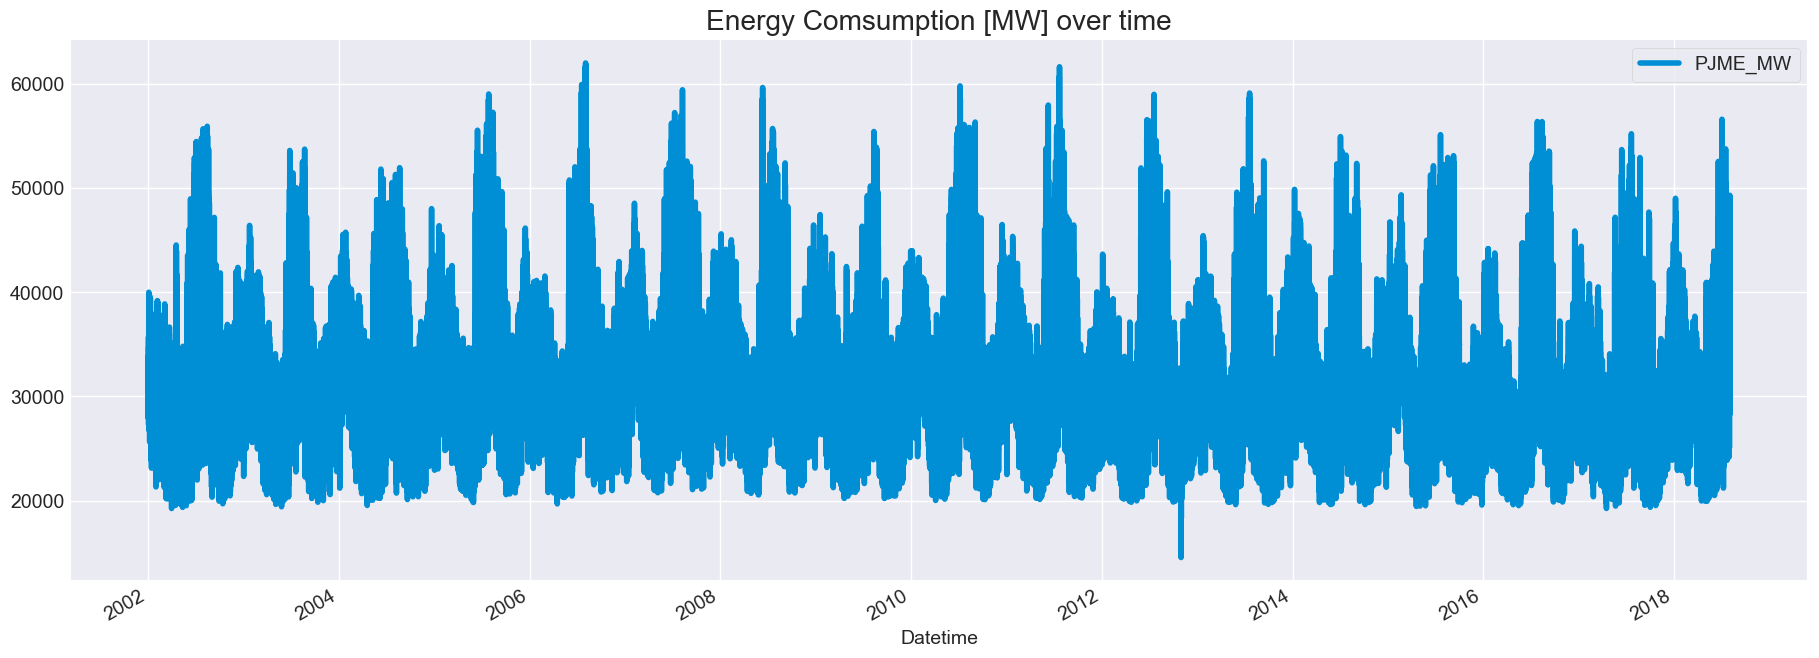

In [264]:
df.plot(figsize=(20, 8),
        title='Energy Comsumption [MW] over time')
plt.show()

## Train/Test Split

In [265]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

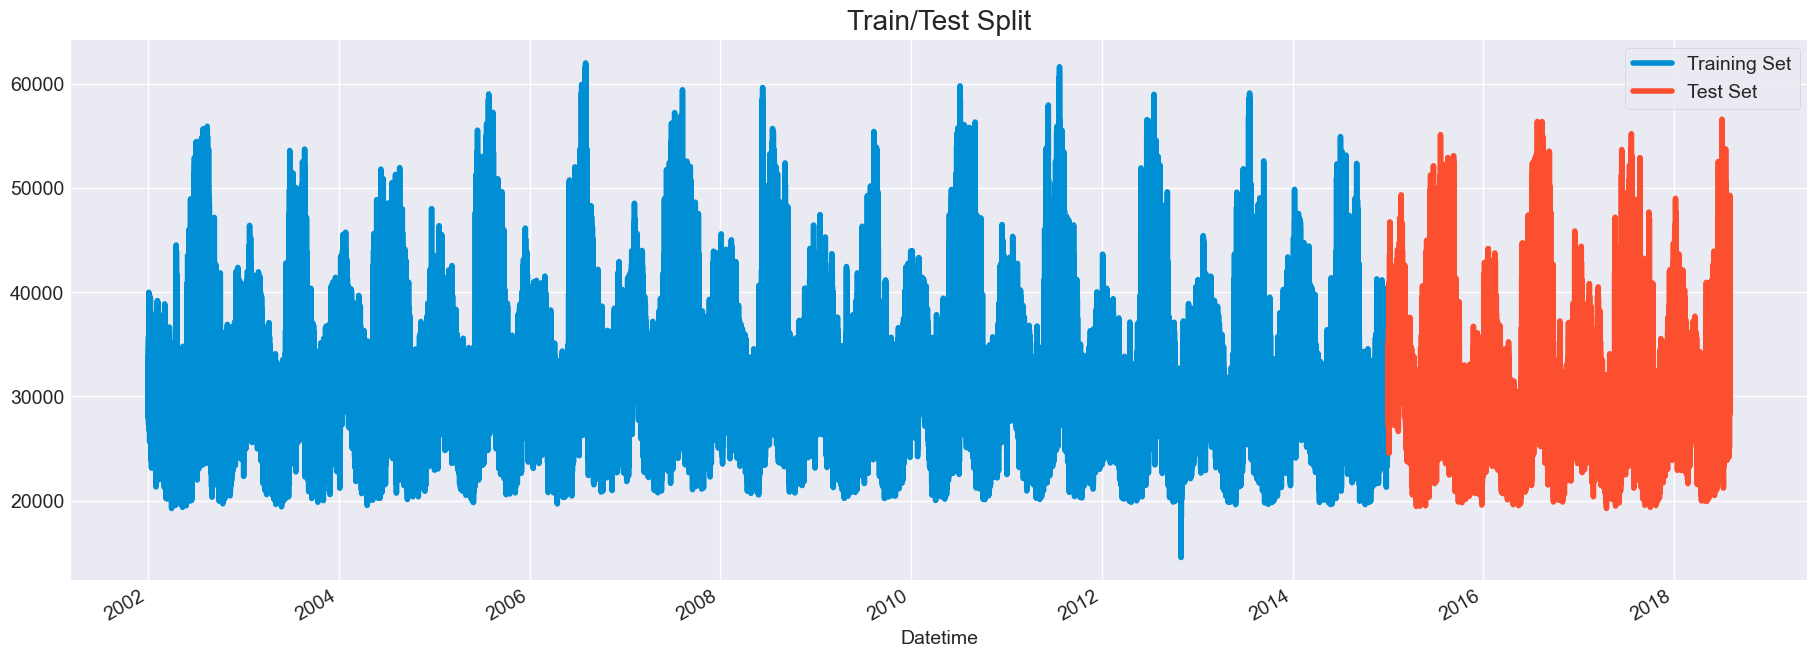

In [266]:
fig, ax = plt.subplots(figsize=(20, 8))
train.plot(ax=ax, label='Training Set', title='Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Feature Engineering

In [267]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [268]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1


## Exploratory Data Analysis

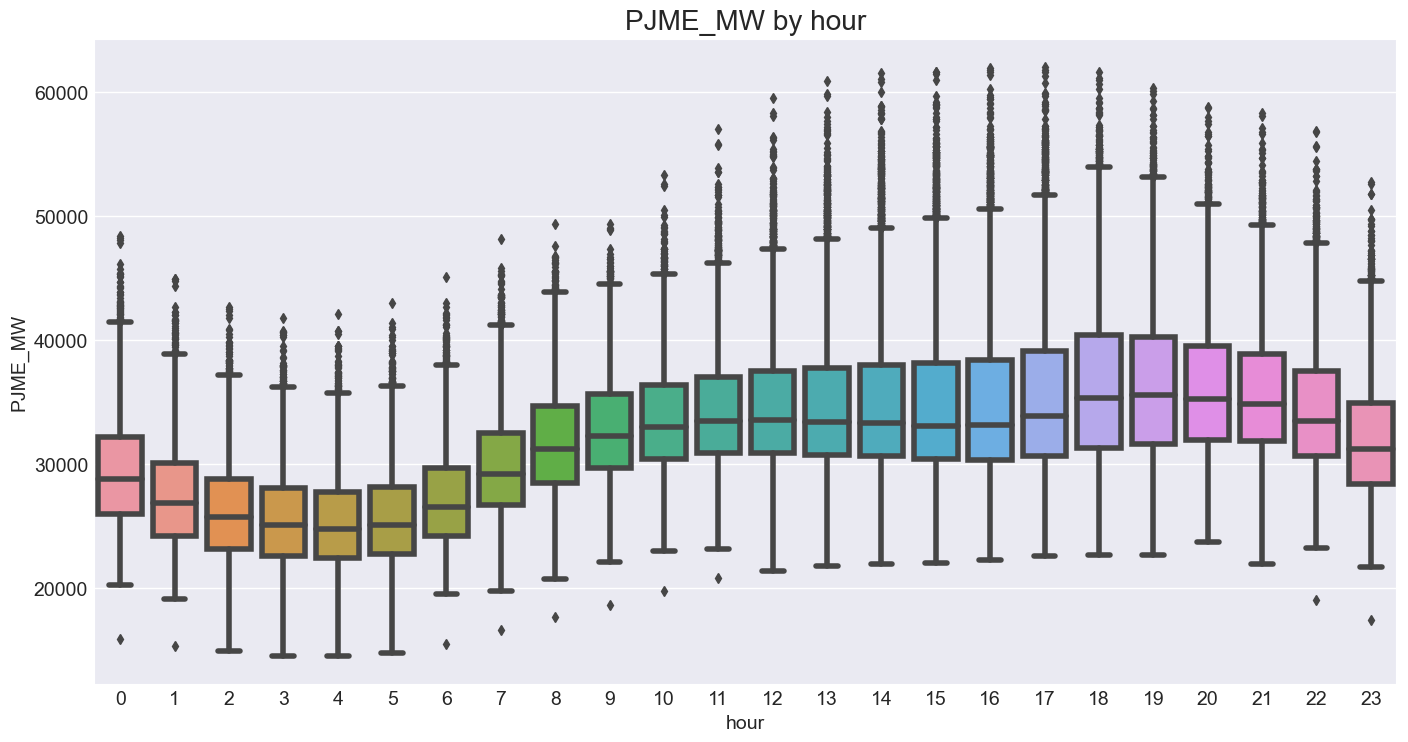

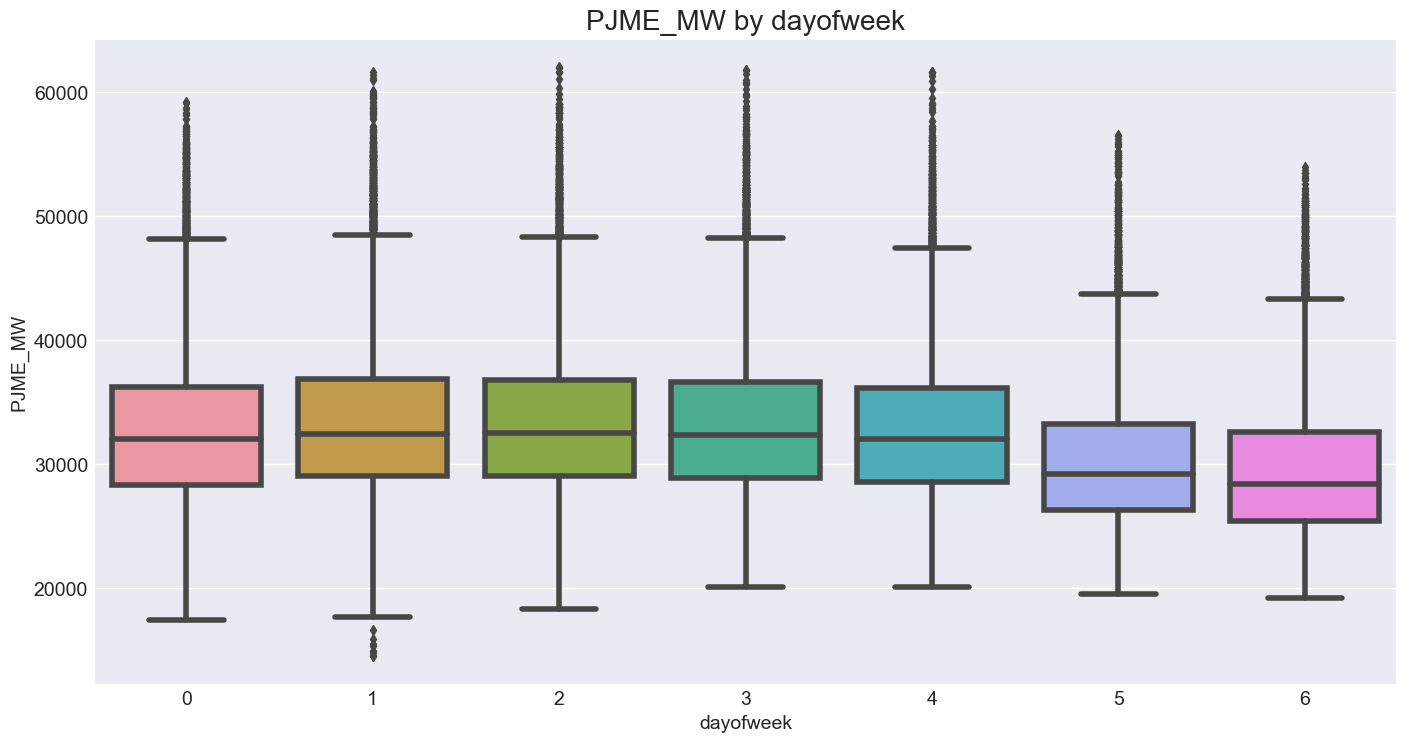

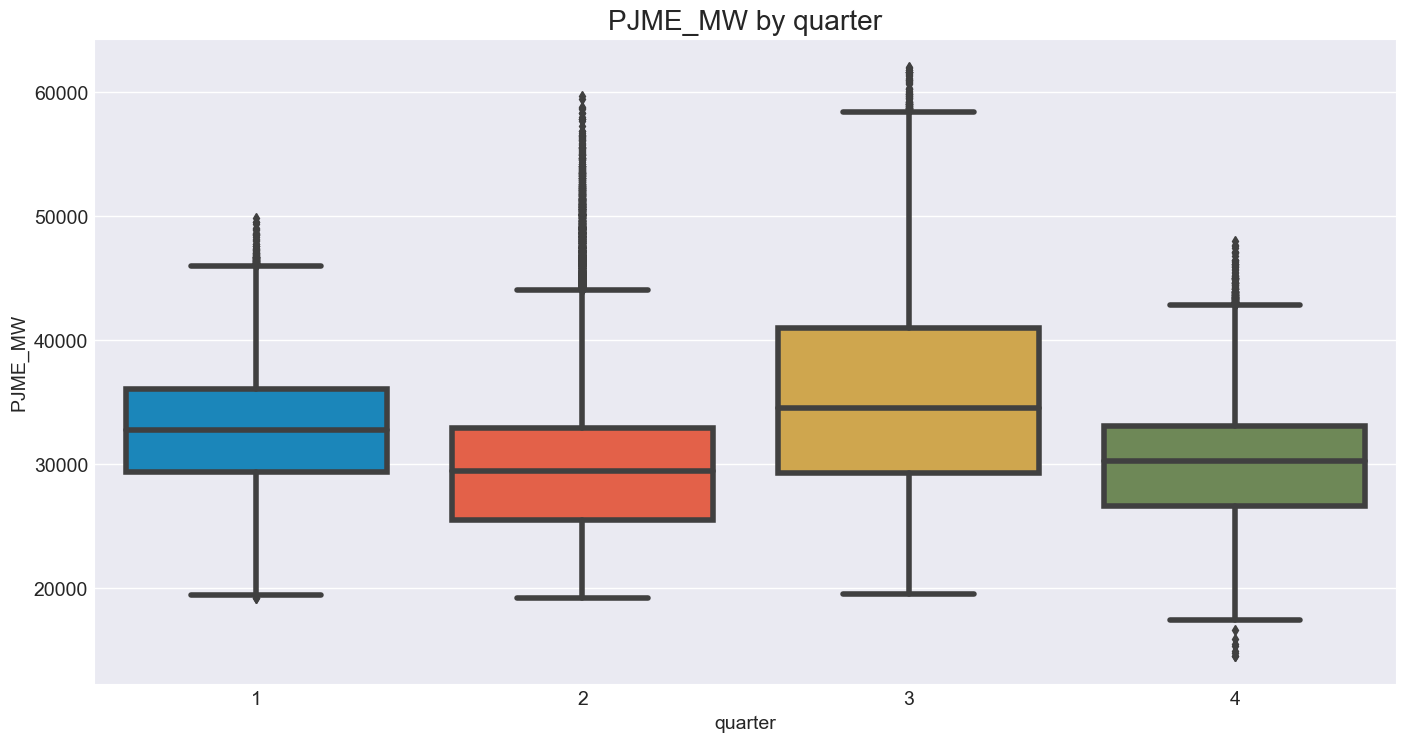

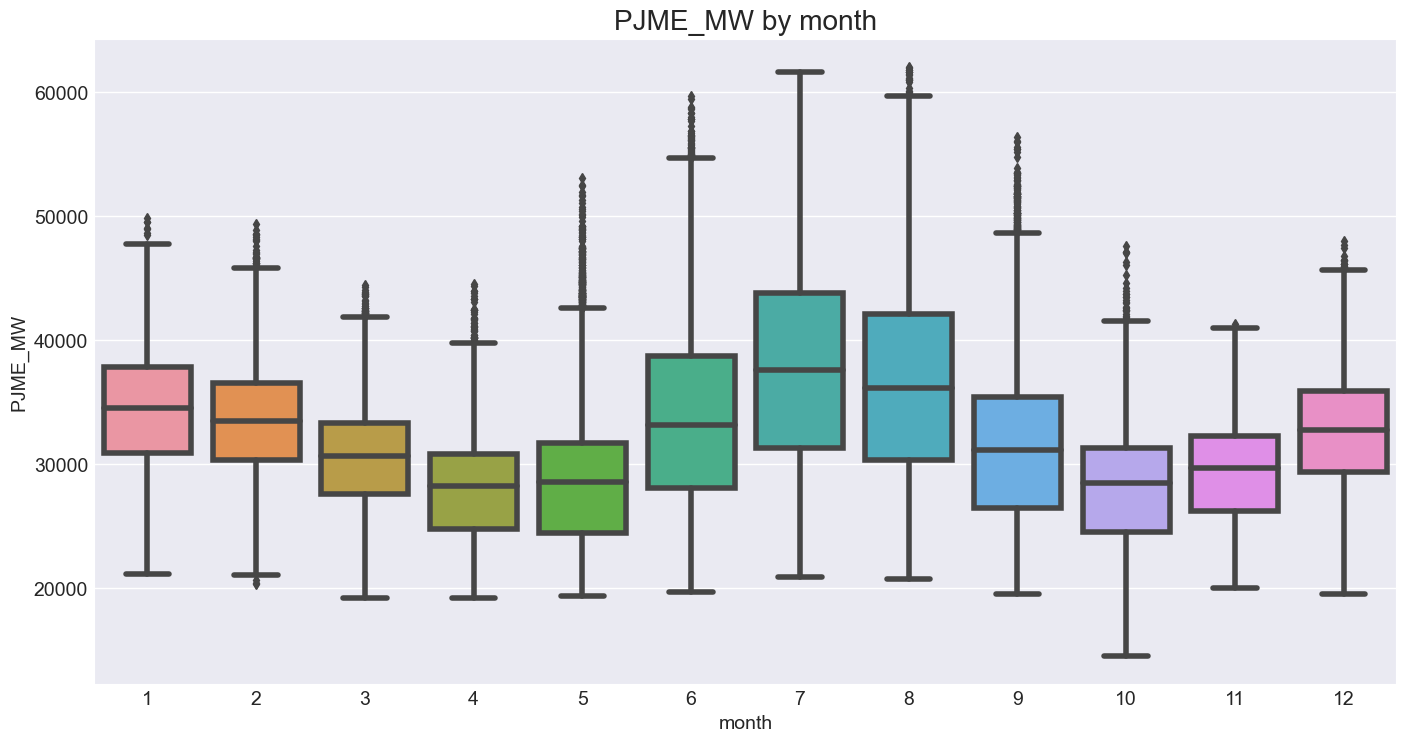

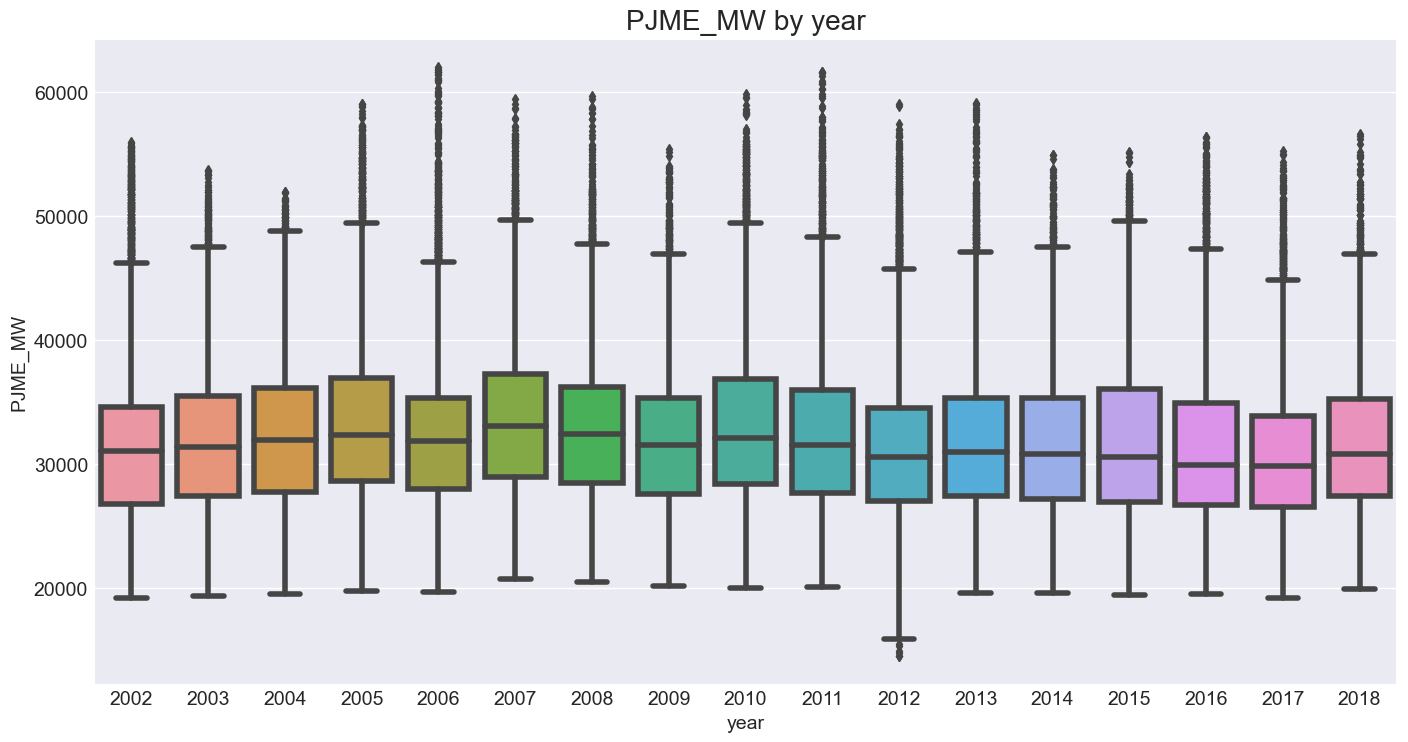

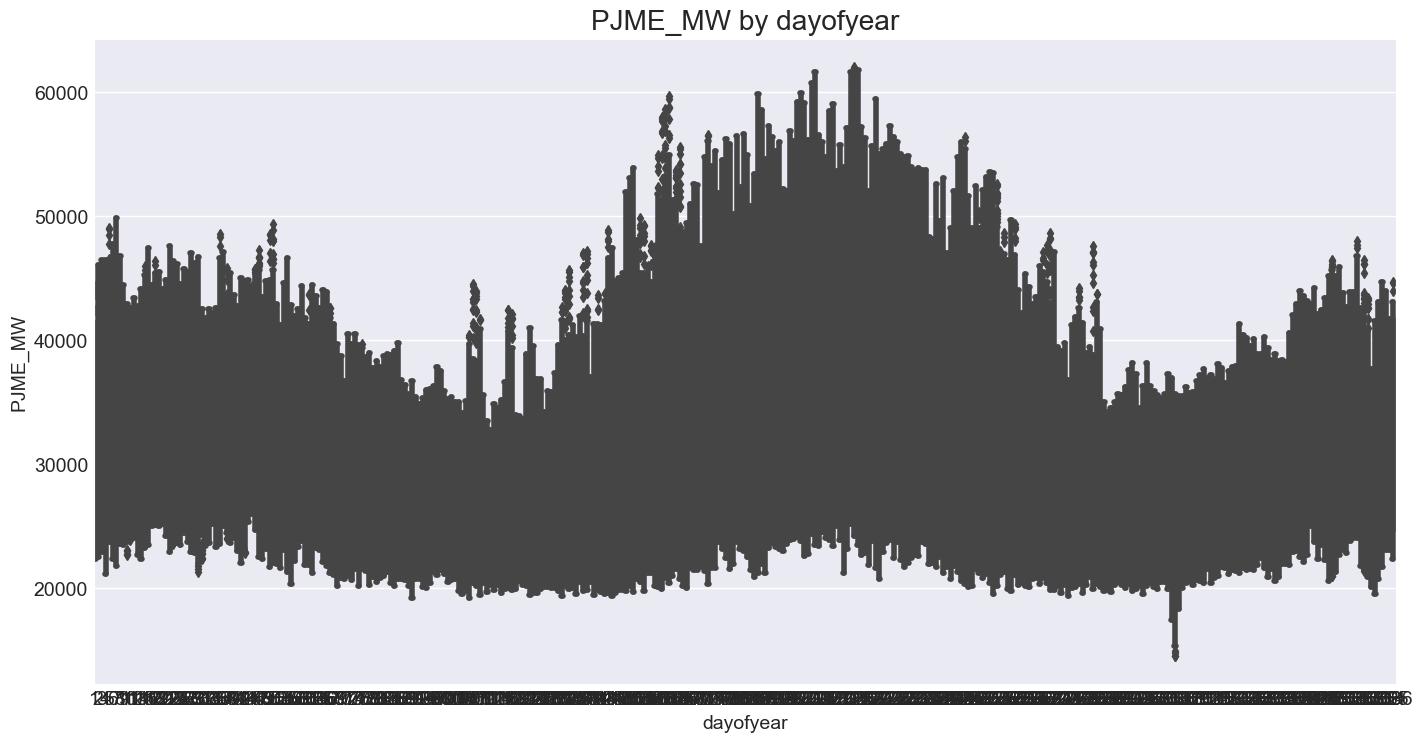

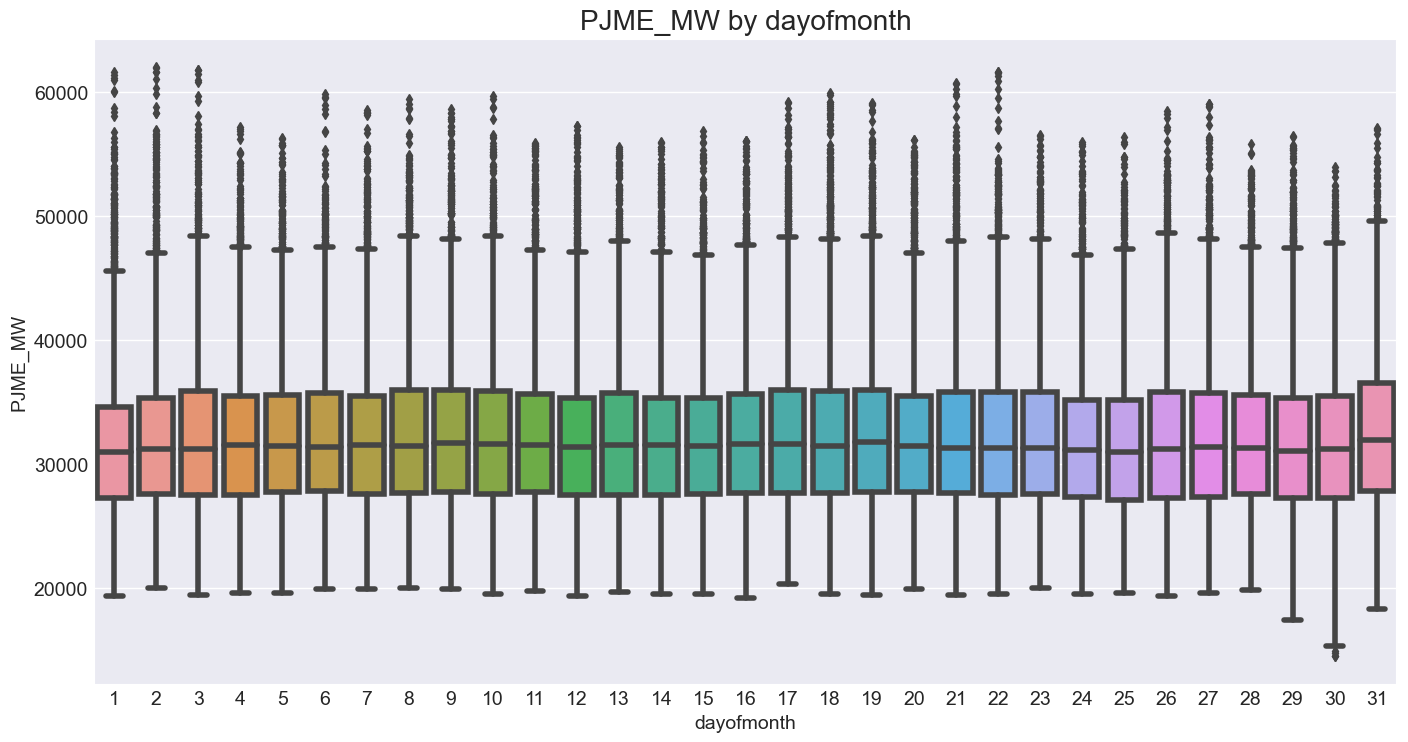

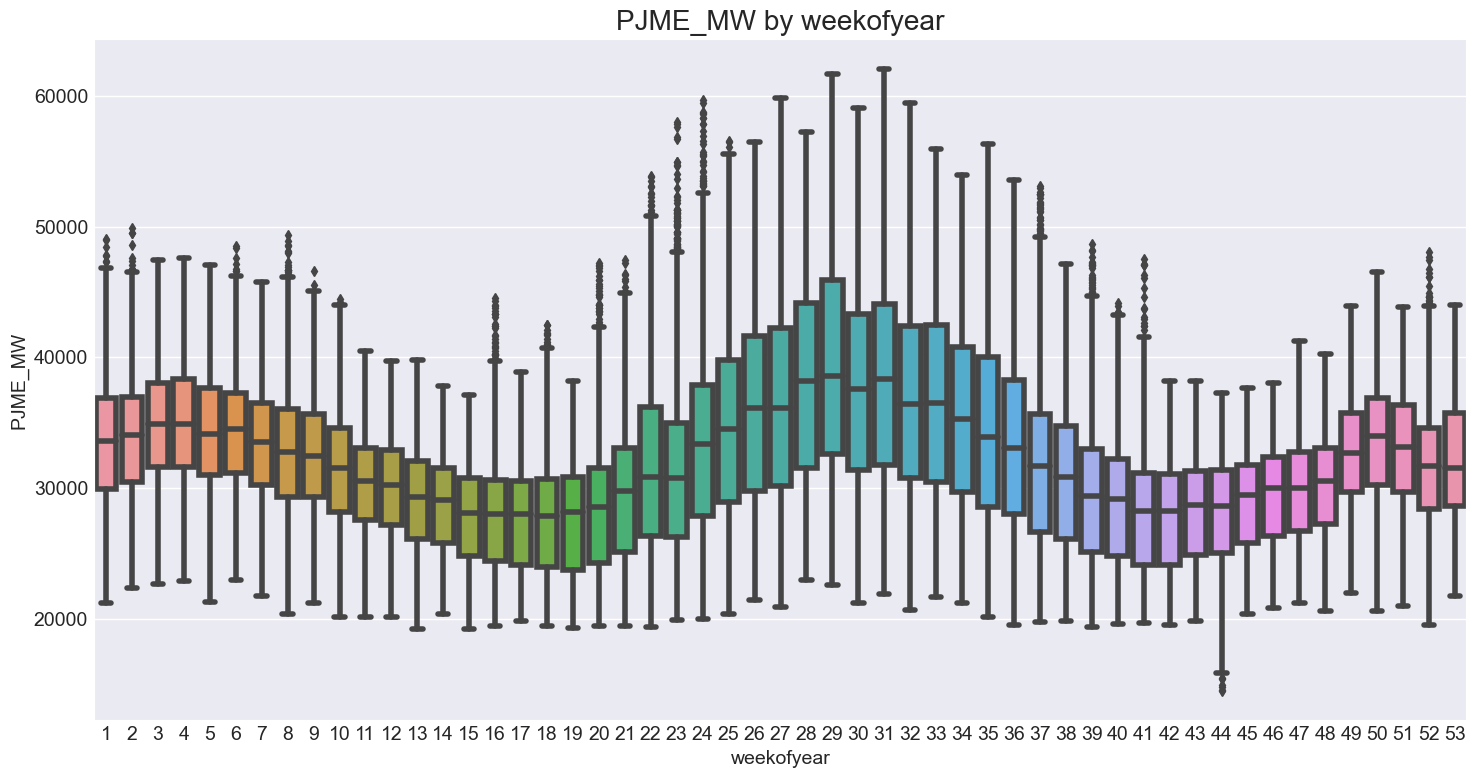

In [269]:
features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
target = 'PJME_MW'


for feature in features:
    plt.figure(figsize=(15,8))
    sns.boxplot(x=feature, y=target, data=df)
    plt.title(f'{target} by {feature}')
    
plt.tight_layout()
plt.show()

In [270]:
df_hour = df.groupby(df['hour'])['PJME_MW'].mean()
df_dayofweek = df.groupby(df['dayofweek'])['PJME_MW'].mean()
df_quarter = df.groupby(df['quarter'])['PJME_MW'].mean()
df_month = df.groupby(df['month'])['PJME_MW'].mean()
df_year = df.groupby(df['year'])['PJME_MW'].mean()
df_dayofyear = df.groupby(df['dayofyear'])['PJME_MW'].mean()
df_dayofmonth = df.groupby(df['dayofmonth'])['PJME_MW'].mean()
df_weekofyear = df.groupby(df['weekofyear'])['PJME_MW'].mean()
dataframes = [df_hour, df_dayofweek, df_quarter, df_month, df_year, df_dayofyear, df_dayofmonth, df_weekofyear]


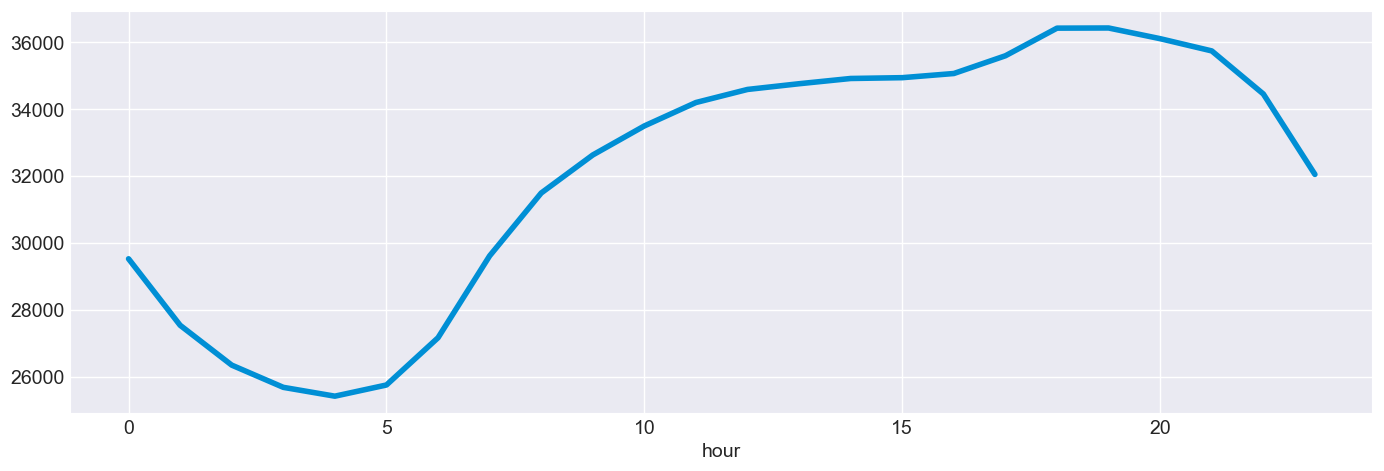

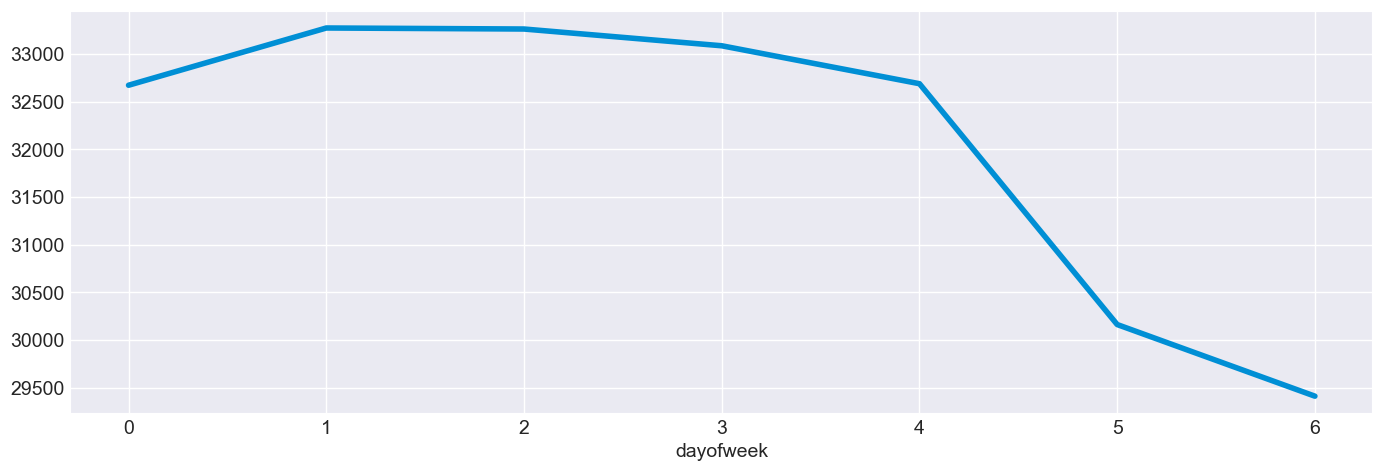

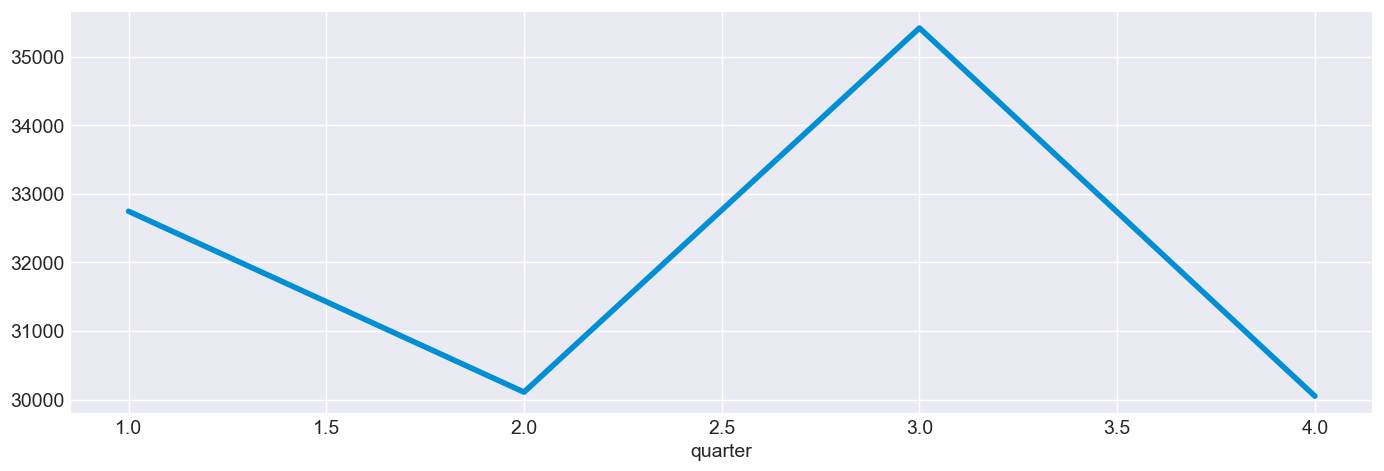

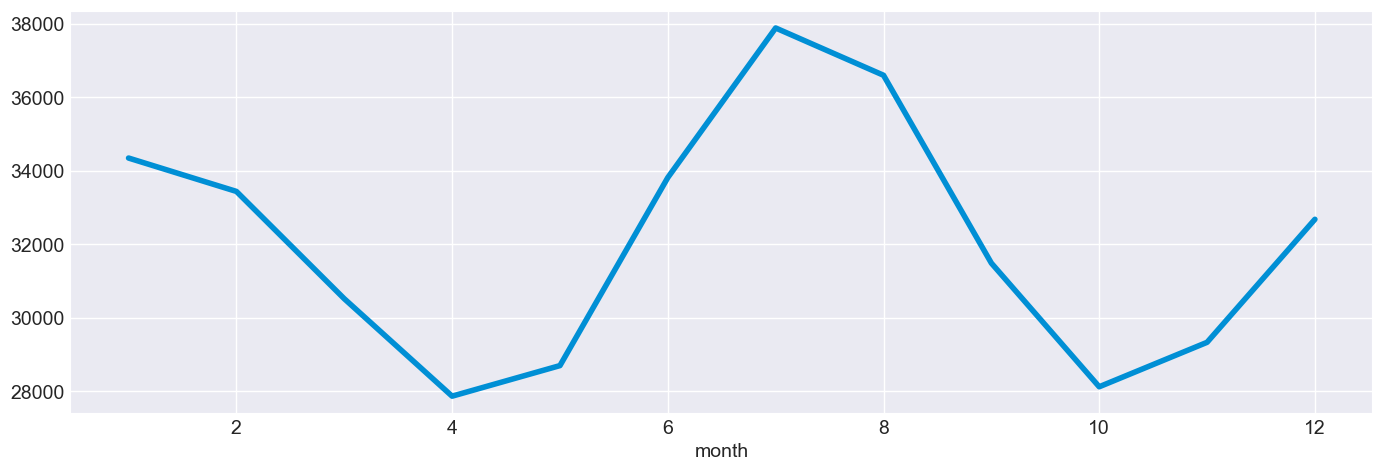

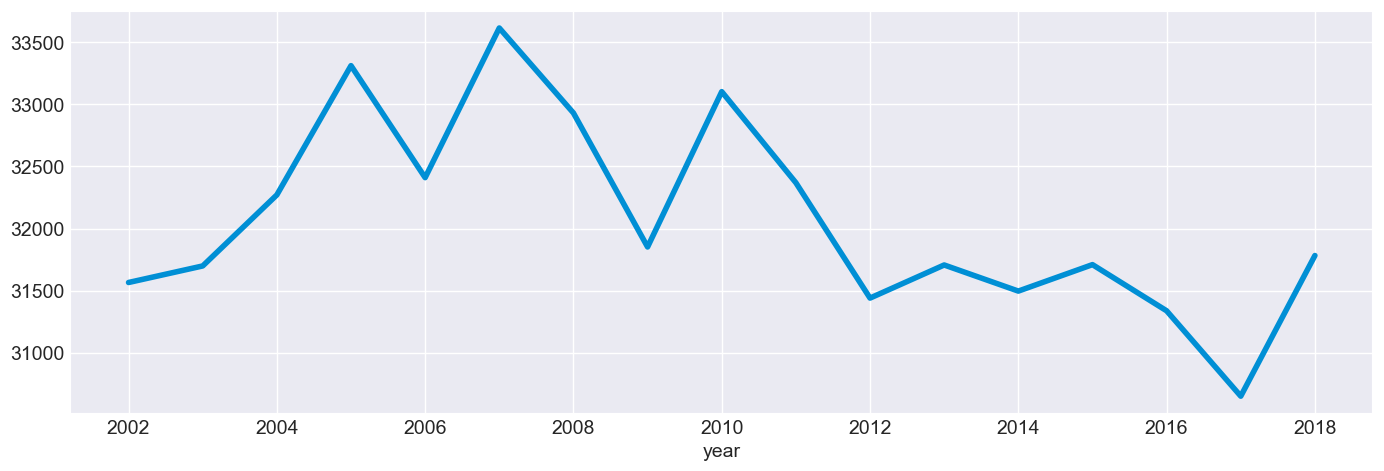

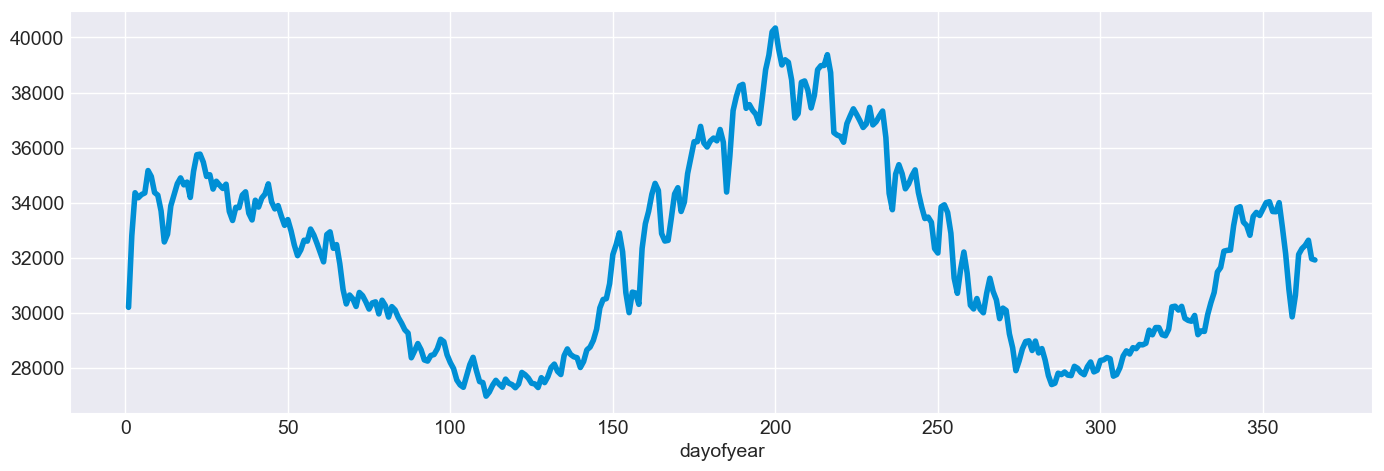

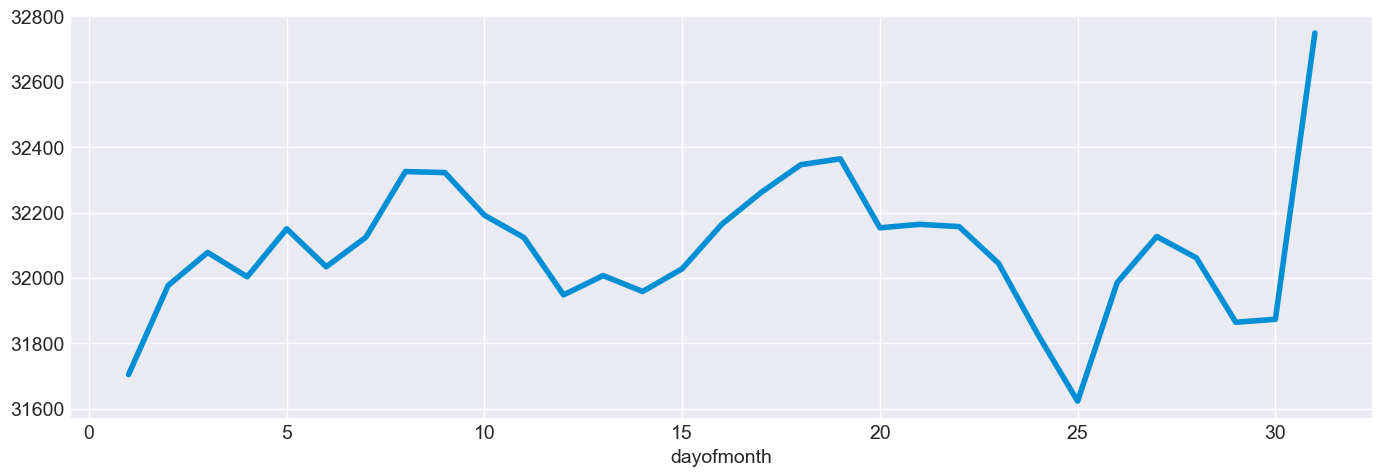

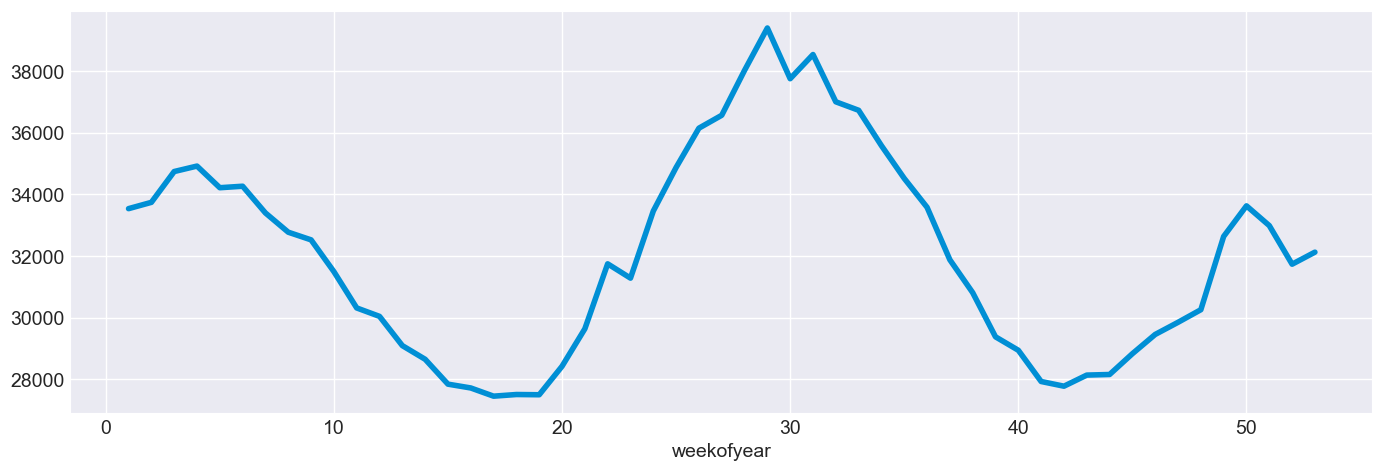

In [271]:
for df_feature in dataframes:
    plt.figure(figsize=(15, 5))
    df_feature.plot()

## Preparing the Data

In [272]:
train = create_features(train)
test = create_features(test)

selected_features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']

X_train = train[selected_features]
y_train = train[target]

X_test = test[selected_features]
y_test = test[target]

## Model building

In [273]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, eval_metric='mae', early_stopping_rounds=50)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
xgb_pred = xgb_model.predict(X_test)

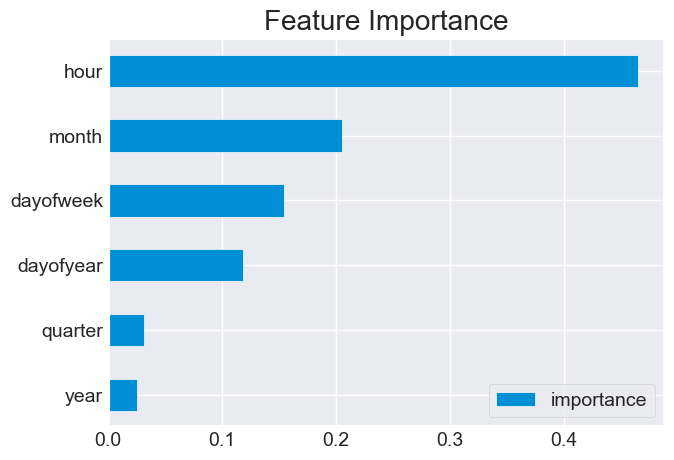

In [274]:
fi = pd.DataFrame(data=xgb_model.feature_importances_,
             index=xgb_model.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Model Evaluation

In [275]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=test['PJME_MW'],
                   y_pred=xgb_pred)

14089415.684619648

In [276]:
mean_absolute_error(y_true=test['PJME_MW'],
                   y_pred=xgb_pred)

2891.838964967995

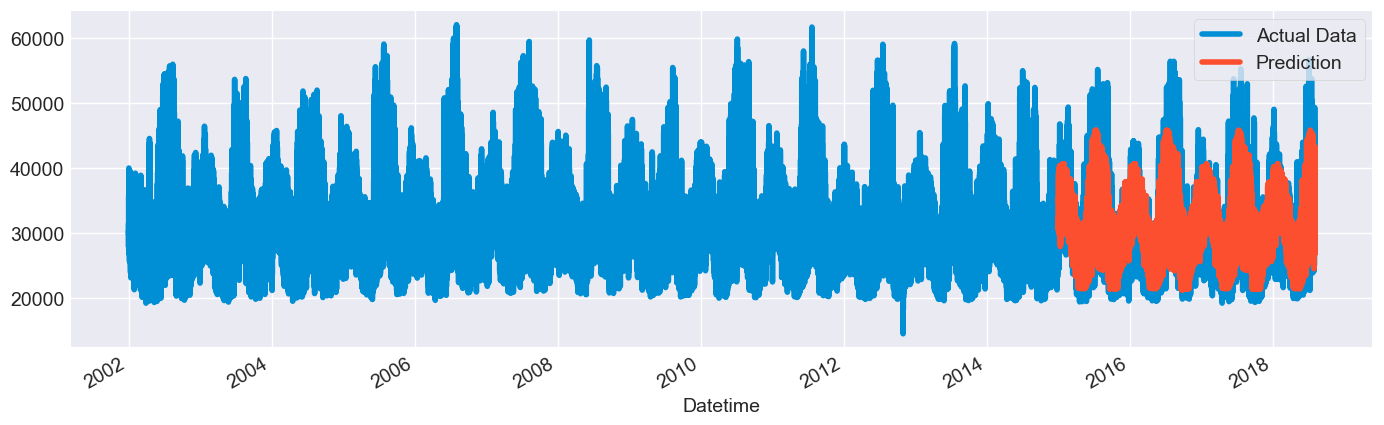

In [277]:
test['prediction'] = xgb_pred
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
plt.figure(figsize=(15, 5))
df['PJME_MW'].plot()
df['prediction'].plot()
plt.legend(['Actual Data', 'Prediction'])
plt.show()

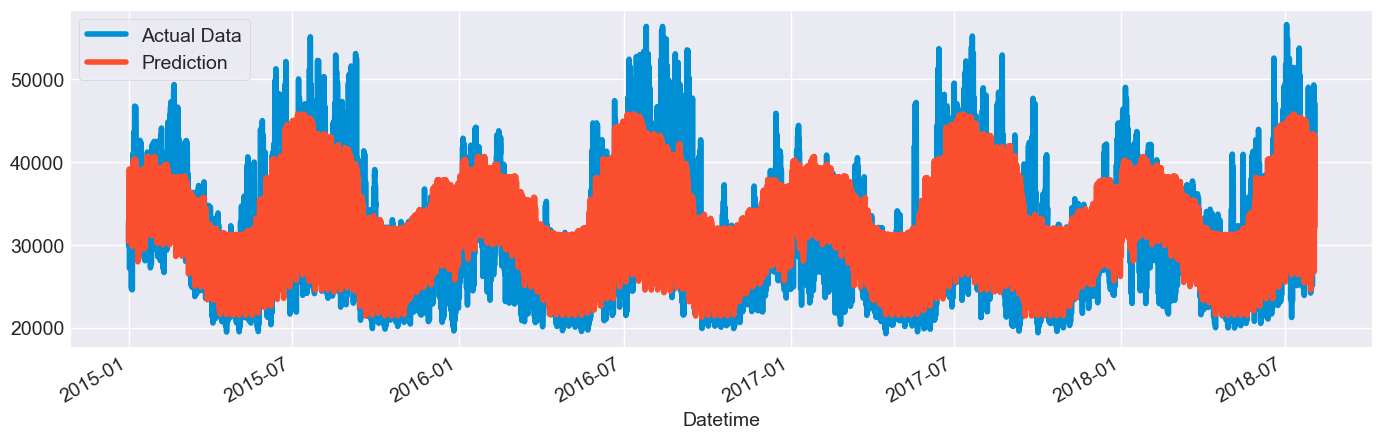

In [278]:
plt.figure(figsize=(15, 5))
test['PJME_MW'].plot()
test['prediction'].plot()
plt.legend(['Actual Data', 'Prediction'])

In [279]:
def plot_performance(test, start_date, end_date, title):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    plt.figure(figsize=(15,5))    
    plt.title(title)
    test['PJME_MW'].plot()
    test['prediction'].plot(style='.')
    plt.legend(['Actual Data', 'Prediction'])
    plt.legend()
    plt.xlim(start_date, end_date)

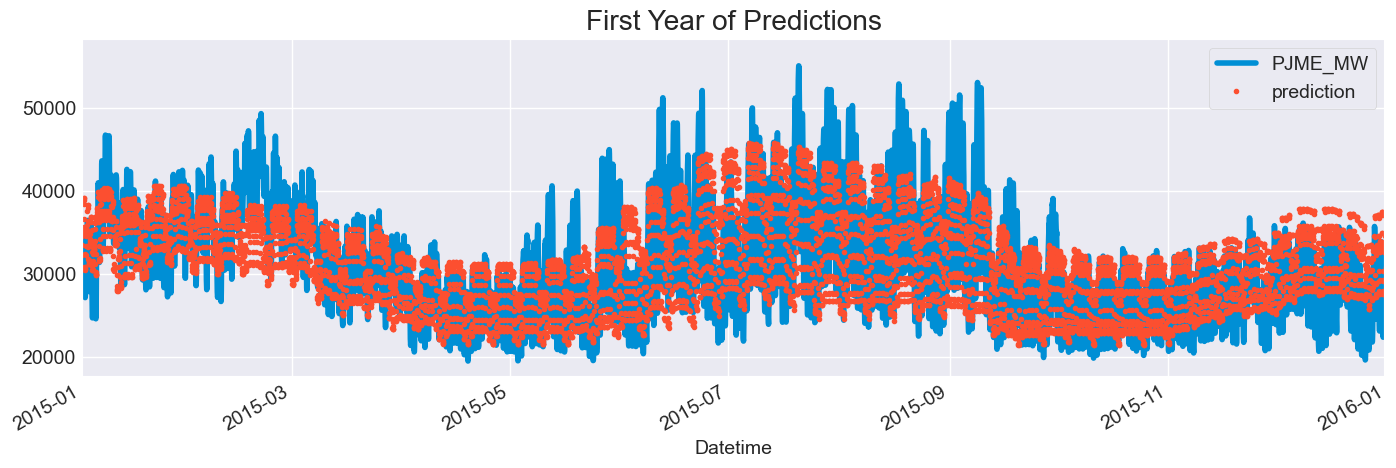

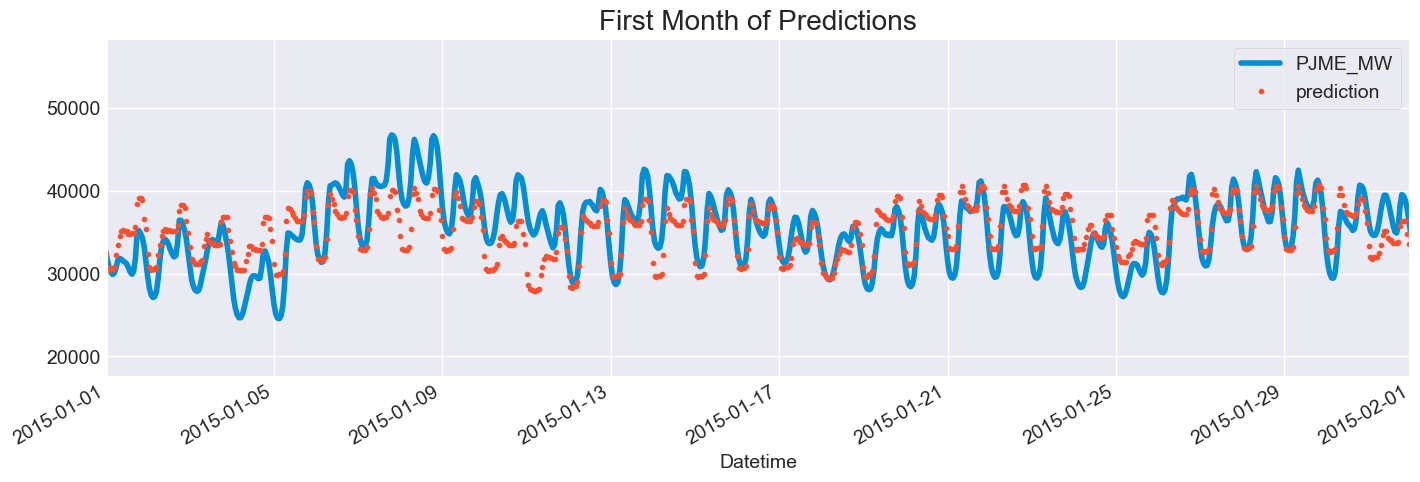

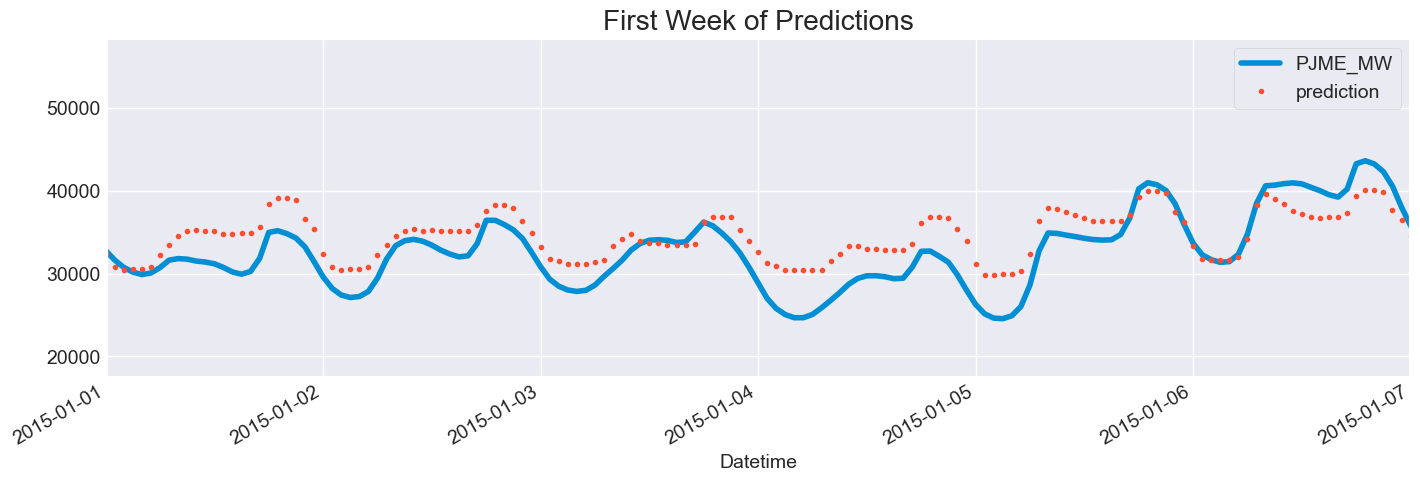

In [280]:
plot_performance(test, '2015-01-01', '2016-01-01', 'First Year of Predictions')
plot_performance(test, '2015-01-01', '2015-02-01', 'First Month of Predictions')
plot_performance(test, '2015-01-01', '2015-01-07', 'First Week of Predictions')

In [281]:
test['abs_error'] = abs(test['PJME_MW'] - test['prediction'])
error_by_day = test.groupby(['year','month','dayofmonth']) \
    .mean()[['PJME_MW','prediction','abs_error']]

In [282]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

PJME_MW    prediction   abs_error
year month dayofmonth                                        
2015 10    28          28500.958333  28580.955078  363.205160
2017 10    24          28657.416667  28576.458984  379.676432
2016 10    27          28611.166667  28554.876953  379.845215
2017 5     2           28546.916667  28644.205078  388.304281
2016 12    30          32213.458333  32379.242188  400.318848
     4     4           28944.125000  29268.455078  426.895426
2018 2     6           35783.833333  35845.406250  460.210938
2016 6     3           31502.625000  31368.466797  474.946777
     5     1           24503.625000  24928.140625  546.320964
2015 3     31          30182.208333  29944.562500  556.665446

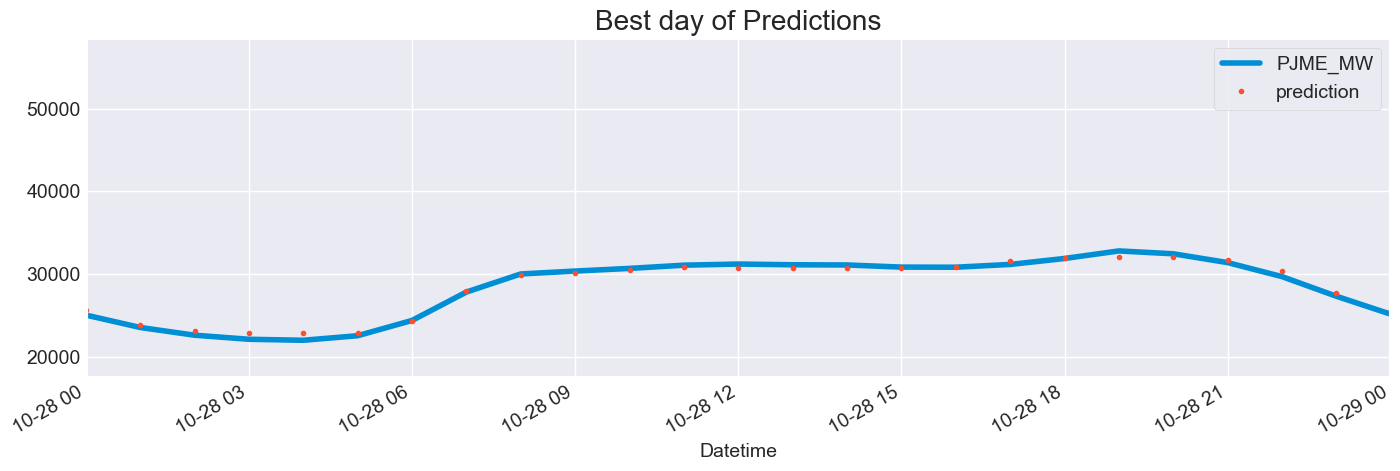

In [283]:
plot_performance(test, '2015-10-28', '2015-10-29', 'Best day of Predictions')

In [284]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

PJME_MW    prediction     abs_error
year month dayofmonth                                          
2016 8     13          45185.833333  30893.771484  14292.063395
           14          44427.333333  30337.513672  14089.820068
     9     10          40996.166667  29875.562500  11120.604411
     8     12          45724.708333  34751.746094  10972.961995
     9     9           43836.958333  32954.816406  10882.139730
2015 2     20          44694.041667  34616.378906  10077.664958
2016 7     4           28399.958333  38278.832031   9878.871419
2018 1     6           43565.750000  33701.667969   9864.082926
2017 5     19          38032.583333  28305.056641   9727.524740
2016 8     11          45225.458333  35927.125000   9298.334635

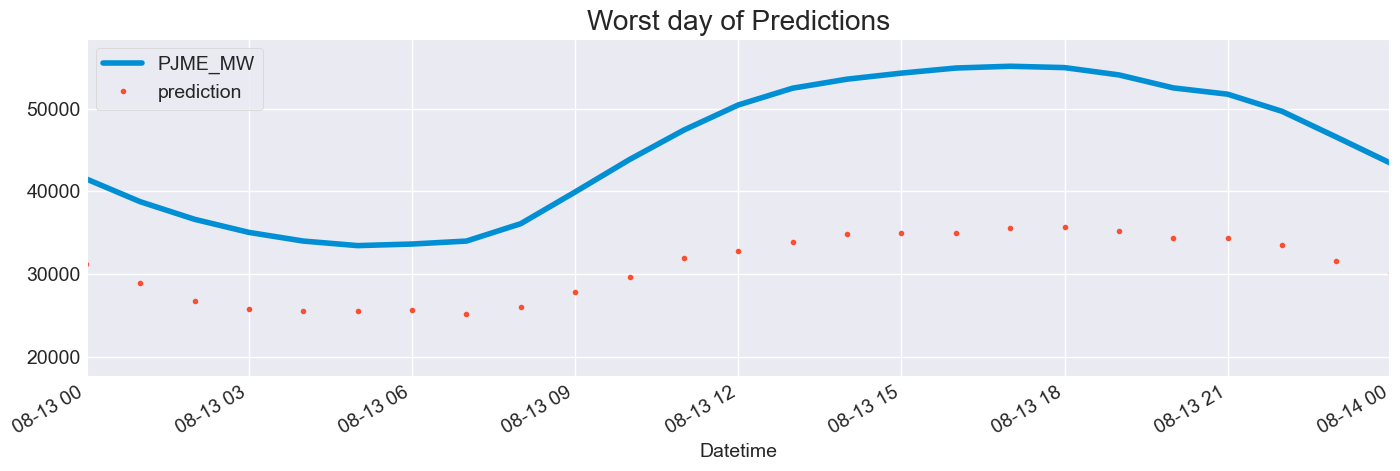

In [285]:
plot_performance(test, '2016-08-13', '2016-08-14', 'Worst day of Predictions')

## Conclusion
In summary, our time series forecasting project for energy consumption has equipped us with the tools to make accurate predictions and gain insights into energy demand patterns. This work has practical implications for resource management and sustainability, despite its limitations. The potential for future improvements and applications in this field is evident, highlighting the importance of time series forecasting for better energy utilization.